In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 시각화 (Matplotlib) 활용와 왕좌의 게임 데이터 분석

## 1. matplotlib 간단 실습

### 1.1 하나의 그래프 그리기
1.1.1 line graph 그리기

In [5]:
import matplotlib.pyplot as plt

In [6]:
sr = Series([100,200,300,200,100], index = ['a','b','c','d','e'])
sr

a    100
b    200
c    300
d    200
e    100
dtype: int64

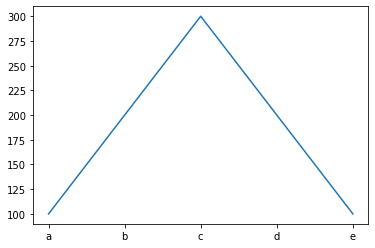

In [7]:
plt.plot(sr)

1.1.2 bar graph 그리기

In [8]:
import random
sr2 = Series(random.sample(range(100,1000),5),index=['a','b','c','d','e'])

In [9]:
sr2

a    159
b    224
c    472
d    612
e    452
dtype: int64

<BarContainer object of 5 artists>

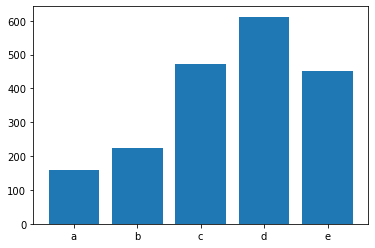

In [10]:
plt.bar(sr2.index,sr2.values)

1.1.3 두 개의 그래프를 하나로 그리기

- <a href = https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html> plt.subplots() </a> 함수는 새로운 figure와 axes(subplots)를 생성해 준다.

<BarContainer object of 5 artists>

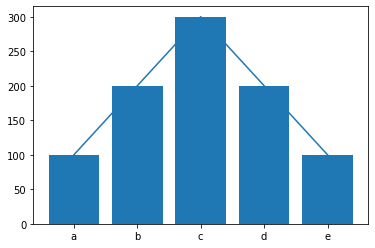

In [11]:
fig, axes = plt.subplots()
axes.plot(sr)
axes.bar(sr.index, sr.values)

1.1.4 두 개 그래프를 서로 다른 y축 적용하기

<BarContainer object of 5 artists>

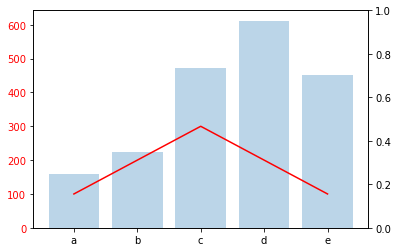

In [12]:
fig, ax = plt.subplots()
ax.plot(sr, color = 'r')
ax.tick_params(axis = 'y', labelcolor = 'r')
ax2 = ax.twinx()
ax.bar(sr2.index, sr2.values,alpha = 0.3)

### 1.2. 여러 개 그래프 그리기 
하나의 figure 안에 여러 개의 axes를 그리기

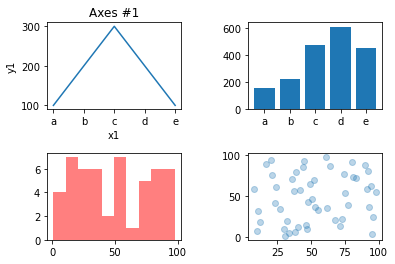

In [13]:
fig, ax_list = plt.subplots(2,2)
ax_list[0,0].plot(sr)
ax_list[0,0].set_title('Axes #1')
ax_list[0,0].set_xlabel('x1')
ax_list[0,0].set_ylabel('y1')
ax_list[0,1].bar(sr2.index, sr2.values)
ax_list[1,0].hist(random.sample(range(1,100),50),bins =10, color = 'r', alpha=0.5)
ax_list[1,1].scatter(random.sample(range(1,100),50),random.sample(range(1,100),50),alpha=0.3)

fig.subplots_adjust(hspace=0.5 , wspace=0.5)

### 1.3. <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> backend </a> 개념
Matplotlib은 매우 다양한 usecase에 사용되며, 이를 모두 충족시키기 위하여 다양한 backend를 지원함.  
가장 많이 활용하는 옵션은 inline으로, 그래프를 output창에 바로 표현되도록 하는 옵션이며, <strong>%maptlotlib inline</strong>를 실행하여 설정한다. 


%로 시작하는 명령어는 Cell Magic 명령어로써, 파이썬 코드가 아니라 Jupyter에게 특정 기능을 수행하도록 하는 명령이다. 즉, %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령이다.

<IPython.core.display.Javascript object>


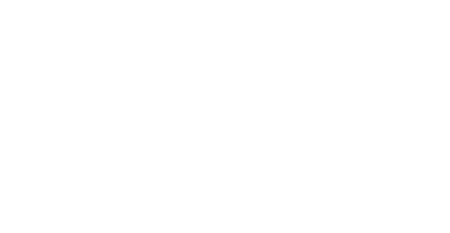

In [14]:
%matplotlib nbagg
plt.plot(sr)

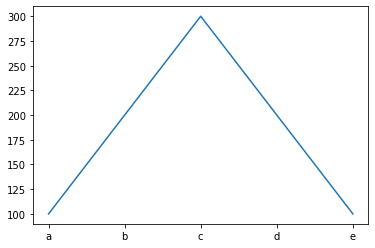

In [15]:
%matplotlib inline
plt.plot(sr)

만약 그래프를 생성한 이후, interactive하게 그래프를 다루고 싶은 경우에는 backend를 interactive backend로 설정하면 된다.  
예를 들어, <strong>%matplotlib nbagg</strong>를 실행하여 <strong>nbagg</strong>으로 설정을 변경할 수 있다.   
보다 다양한 설정 옵션을 확인하려면 <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> 여기 </a>를 참고하면 된다.  

아래와 같이 nbagg로 설정한 후, 그래프를 생성하면 output 창에 몇몇 버튼과 함께 그래프가 그려진다.  
버튼들을 활용하여 zoon-in, zoom-out이 가능하다.   
그래프를 그린 이후, set_title(), set_xlabel() 함수를 수행하면 현재 그래프에 적용되는 것을 확인할 수 있으며, 오른쪽 상단에 있는 파란색 버튼을 클릭하면 interactive 모드가 종료된다. 

### 1.4 <a href = https://matplotlib.org/users/customizing.html> matplotlib 설정 변경</a>

<strong> 1.4.1 stylesheet 변경</strong>   
   matplotlib을 통해 데이터 시각화할 때 적용되는 스타일을 변경 가능하며, 사용가능한 스타일시트 목록 및 샘플은 <a href= https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html> 여기 </a>에서 확인 가능하다.

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [17]:
%matplotlib inline

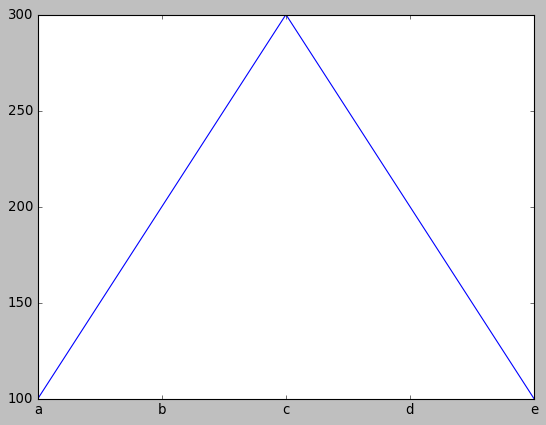

In [18]:
plt.style.use('classic')
plt.plot(sr)

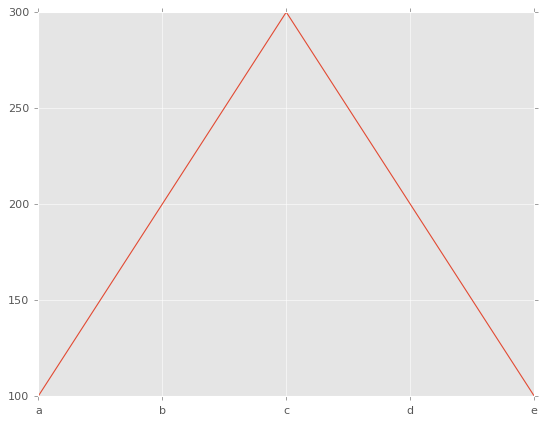

In [19]:
plt.style.use('ggplot')
plt.plot(sr)

1.4.2 <strong> <i> matplotlibrc</i></strong> 파일 수정을 통한 파라미터 수정 
- matplotlibrc 파일을 통해 figure 크기, axes의 폰트사이즈, 색상, 스타일 등 matplotlib의 모든 속성(property)들을 설정 가능하다. 
- 파일을 변경한 후 저장하면, 이후에는 변경된 설정이 계속 사용된다.
- matplotlibrc 파일을 수정한 후에는 jupyter notebook을 재시작해야 수정 내용이 반영된다. 


matplotlibrc 파일의 위치를 찾으려면 matplotlib.matplot.lib_fname()를 수행하면 된다.

In [20]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\82103\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

1.4.3 matplotlib.rcParams을 통한 동적 설정 변경

- matplotlib의 설정 정보는 <strong> matplotlib.rcParams</strong>에 저장되어 있으며, rcParams는 <strong><i>사전(Dict)</i></strong> 타입니다.
- rcParams 변경을 통해 동적으로 설정이 변경가능하며, 변경 즉시 반영된다. 

In [21]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [22]:
matplotlib.rcParams['font.family']

['Malgun Gothic']

## 2. <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>Pandas의 plot() 함수를 통한 시각화</a>
- pandas의 대표적인 데이터타입인 Series와 DataFrame은 plot() 함수를 제공하며 이를 통해 여러 차트를 그릴 수 있다.   
- 내부적으로는 Series.plot()과 DataFrame.plot() 모두 matplotlib를 사용하며, 파라미터 인자에 따라 적절한 함수가 호출된다.  
- matplotlib은 plot()은 line graph, bar()는 bar graph, hist()는 히스토그램 등 차트의 종류에 따라 다른 함수를 호출해야 하지만, pandas는 차트의 종류에 상관 없이, 차트를 그리는 함수는 plot()이며, kind 인자를 통해 차트의 종류를 설정할 수 있다.   
- matplotlib의 함수들을 직접 사용하는 것보다 사용자 친화적인 인터페이스를 제공하지만, matplotlib의 모든 기능을 제공하지는 않으므로 약간의 불편함은 존재한다.


In [23]:
import matplotlib.pyplot as plt
from pandas import DataFrame

인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2018, 2019, 2020]

In [24]:
df

,서울,경기,충청,경상,전라
2018,1053.5,1023,512,897,451
2019,1023.0,1067,489,872,421
2020,987.0,1123,487,811,399


기본 그리기 - <a href= https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D>line graph</a>

<AxesSubplot:>

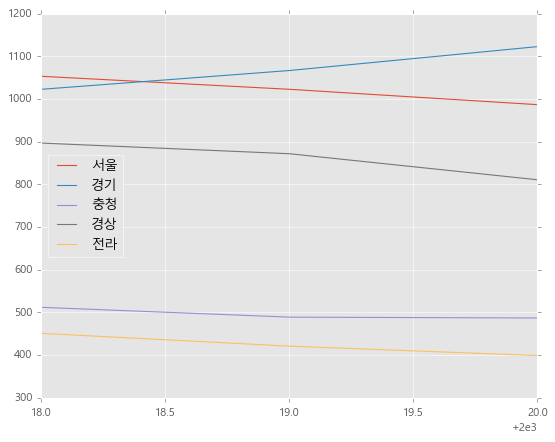

In [25]:
# plt.plot(df) #matplotlib.pyplot.plot()
plt.rc('font', family='Malgun Gothic')
df.plot(kind = 'line')


<BarContainer object of 3 artists>

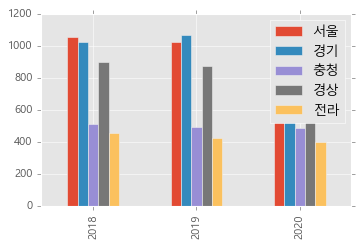

In [26]:
df.plot(kind='bar' , figsize = (5,3))
plt.bar(df.index, df['서울'])

In [27]:
df

,서울,경기,충청,경상,전라
2018,1053.5,1023,512,897,451
2019,1023.0,1067,489,872,421
2020,987.0,1123,487,811,399


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


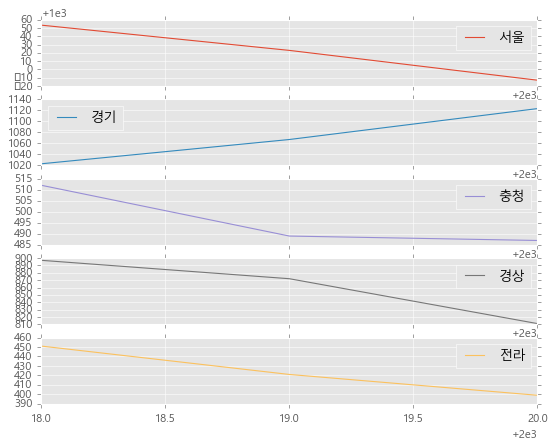

In [28]:
df.plot(subplots=True)

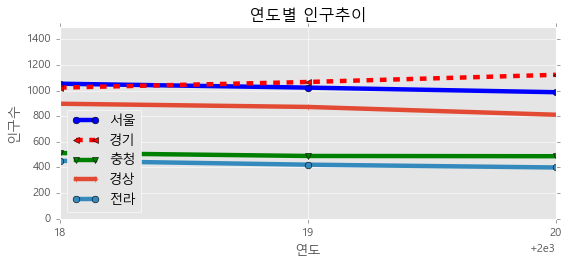

In [29]:
axes = df.plot(kind = 'line', 
        title = '연도별 인구추이',
        xlabel = '연도',
        ylabel = '인구수',
       figsize = (8,3),
       subplots = False,
       xticks = df.index,
       ylim = [0, 1500],
       style = ['bo-','r<--','vg-','+-','o-'],
       lw=4)


In [30]:
axes.figure.savefig('test.jpg')

<img src="img/예제실습/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

array([<AxesSubplot:title={'center':'2018'}>,
       <AxesSubplot:title={'center':'2019'}>,
       <AxesSubplot:title={'center':'2020'}>], dtype=object)

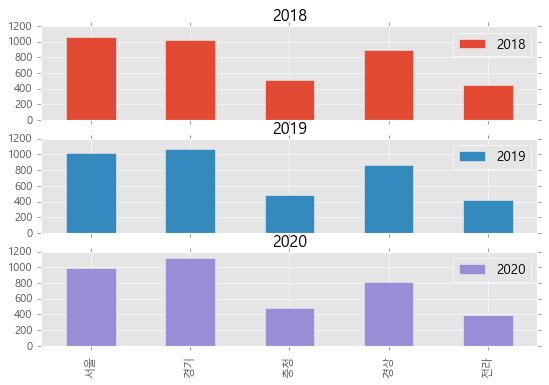

In [31]:
df.T.plot(kind = 'bar', 
        figsize = (8,5),
        subplots = True) # 각각 별도로 그림

In [32]:
# 실습. 연도별 지역별 인구수 그래프 그리기


## 3. 왕좌의 게임 데이터 분석 및 시각화 실습
#### 1) 데이터 적재
- battless.csv : 전투의 이름, 발생년도, 공격/수비 정보(가문, 왕, 군대 규모 등)을 저장
- deaths.csv : 캐릭터들의 이름, 성별 등 기본 정보와 사망 정보

In [33]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [34]:
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')
death.head(2)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0


In [35]:
# name 이 null이 없는것을 확인
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


#### 2) 책의 권(Book of Death)별로 사망자 수 추이 시각화

In [36]:
death['Book of Death'].value_counts()

3.0    97
2.0    73
5.0    61
1.0    49
4.0    27
Name: Book of Death, dtype: int64

In [37]:
# 1) value_counts() 함수 활용
bookOfDeath = death['Book of Death'].value_counts().sort_index()
# 2) pivot_table()
death.pivot_table(index = 'Book of Death', 
                  values = 'Name' , # Nan 값이 없는 칼럼으로 고른것 
                  aggfunc = 'count')


,Name
Book of Death,
1.0,49
2.0,73
3.0,97
4.0,27
5.0,61


In [38]:
# 적용 안됐음
bookOfDeath.columns = ['# of death']

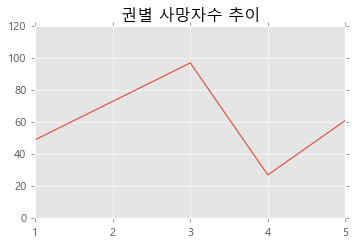

In [39]:
ax = bookOfDeath.plot(figsize= (5,3),
                xticks = bookOfDeath.index,
                ylim = [0,120],
                title = '권별 사망자수 추이')

In [40]:
ax.set_xlabel('권')
ax.set_ylabel('사망자수')

Text(2.444444444444441, 0.5, '사망자수')

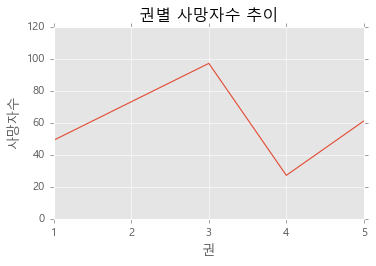

In [41]:
ax.figure

In [42]:
# 그래프를 파일로 저장
ax.figure.savefig('test2.jpg')

#### 3) 대규모 전투의  공격진영과 수비 진영의 숫자 시각화
대규모 전투 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [43]:
# 1. 대규모 전투만 선택

big_battles = battles[battles.attacker_size + battles.defender_size >= 10000]

In [44]:
# 2-1. 필요한 컬럼만 선택 
big_battles2 = big_battles[['name','attacker_size','defender_size']].set_index('name')

<AxesSubplot:ylabel='name'>

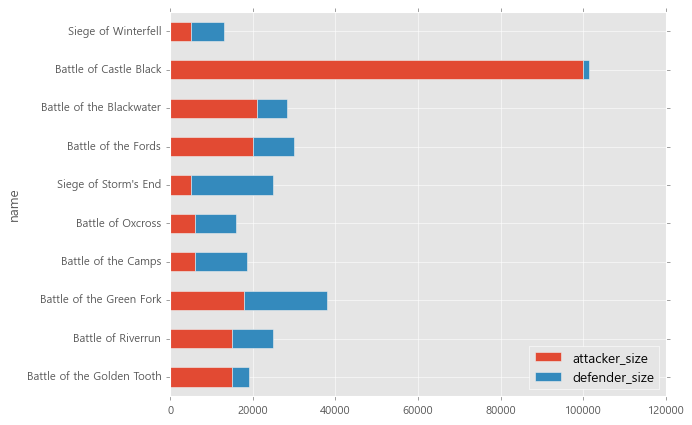

In [45]:
# 2-2 시각화
big_battles2.plot(kind='barh',
                stacked = True)

<AxesSubplot:ylabel='name'>

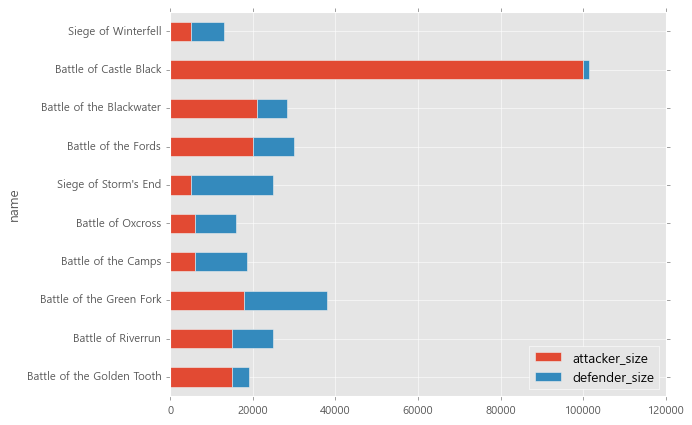

In [46]:
# 3 두번째 방법, plot()의 x,y 인자 활용
big_battles.plot(x = 'name', y= ['attacker_size','defender_size'],
            kind = 'barh', stacked = True)


#### 4) (실습 #1) 가문 별로 전쟁을 참여한 횟수 시각화

In [47]:
battles
# attacker_1 ~ defender_4 까지의 컬럼 활용

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,...,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


In [48]:
# 1. 필요한 컬럼만 선택
# battles[['attacker_1','attacker_2','attacker_3','attacker_4']]
# battles.loc[:, 'attacker_1':'attacker_4']
ex1 = battles.filter(regex = '^attacker_[1-4]|defender_[1-4]',axis=1)

In [49]:
ex1.attacker_1.value_counts()

Stark                          8
Lannister                      8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Free folk                      1
Brave Companions               1
Bracken                        1
Darry                          1
Brotherhood without Banners    1
Name: attacker_1, dtype: int64

<AxesSubplot:>

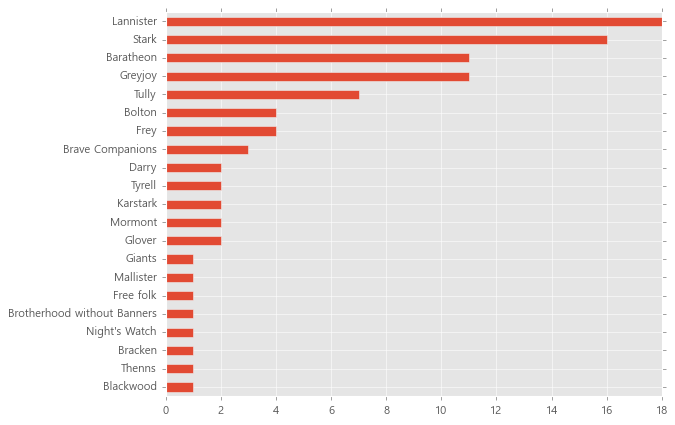

In [50]:
전쟁가문 = pd.Series(dtype = 'float64')
for col in ex1.columns:
    전쟁가문 = 전쟁가문.add(ex1[col].value_counts(), fill_value=0)

전쟁가문.sort_values().plot(kind='barh')

In [51]:
# 33, 34 내분 중복 칼럼 제거
전쟁가문2 = pd.Series(dtype='float64')
for idx,data in ex1.iterrows():
    tmp = pd.Series(list(set(data))).value_counts()
    전쟁가문2 = 전쟁가문2.add(tmp,fill_value = 0)

In [52]:
전쟁가문2

Baratheon                       8.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

#### 5) (실습 #2) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [59]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [60]:
#1. 년도별 사망자수 구하기
death_for_year = death['Death Year'].value_counts().sort_index()

In [62]:
# 년도별 전쟁횟수
# battles.year.value_counts()

#select year, count(*) from battles group by year;
battle_for_year = battles.pivot_table(index = 'year',
                   aggfunc ='count',
                   values = 'name')


In [69]:
# 3. 두 분석결과를 하나의 데이터프레임으로 합치기
data = pd.concat([death_for_year,battle_for_year],axis=1)
data.columns = ['# of death','# of battles']

<AxesSubplot:title={'center':'년도별 사망자와 전쟁횟수 추이'}>

C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82103\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


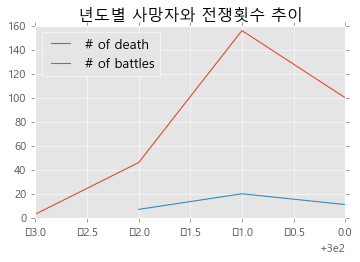

In [71]:
data.plot(figsize= (5,3),
         title = '년도별 사망자와 전쟁횟수 추이')

In [72]:
data.corr()

,# of death,# of battles
# of death,1.000000,0.978443
# of battles,0.978443,1.000000
